In [23]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymongo

In [24]:
client = pymongo.MongoClient('172.16.100.54',27017,charset='utf8')
ltc_data= client['ltc_data']

ConfigurationError: Unknown option charset

In [22]:
wamp_history = ltc_data['wamp_history']
cursor = wamp_history.find()
index=["baseTopic" , "dst" , "src" , "seq" , "SNR" , "RSSIpkt" , "BW" , "CR" , "SF" , "sensor_id" , "version", "command_id", "data_length" , "data" , "mote_lon" , "mote_lat" , "time" ]
result = pd.DataFrame(list(cursor),columns=index)
# result.to_csv('ltc_v1.0_100.csv',encoding='utf8')
result

NameError: name 'ltc_data' is not defined

In [2]:
index =["baseTopic" , "dst" , "src" , "seq" , "SNR" , "RSSIpkt" , "BW" , "CR" , "SF" , "sensor_id" , "version", "command_id", "data_length" , "data" , "mote_lon" , "mote_lat" , "time" ]
ltc_data_1 = pd.read_csv('ltc_v1.0_100.csv',sep=',')
ltc_data_1.head()

,Unnamed: 0,baseTopic,dst,src,seq,SNR,RSSIpkt,BW,CR,SF,sensor_id,version,command_id,data_length,data,mote_lon,mote_lat,time
0,0,LTC-base1,1,7,3,7,-96,125,4/5,12,2,1,9,1,",",0,0,2017-07-17 18:18:19
1,1,LTC-base1,1,7,0,7,-101,125,4/5,12,2,1,9,1,",",0,0,2017-07-17 18:20:00
2,2,LTC-base1,1,7,1,7,-100,125,4/5,12,2,1,9,1,",",0,0,2017-07-17 18:20:04
3,3,LTC-base1,1,7,2,7,-101,125,4/5,12,2,1,9,1,",",0,0,2017-07-17 18:24:58
4,4,LTC-base1,1,7,4,5,-103,125,4/5,12,2,1,9,1,",",0,0,2017-07-17 18:25:11


In [3]:
index1=[ "SNR" , "RSSIpkt" ,  "sensor_id" ,"command_id",  "data" , "time" ]

In [4]:
result_1 = pd.DataFrame(ltc_data_1,columns=index1)
result_1.head()

,SNR,RSSIpkt,sensor_id,command_id,data,time
0,7,-96,2,9,",",2017-07-17 18:18:19
1,7,-101,2,9,",",2017-07-17 18:20:00
2,7,-100,2,9,",",2017-07-17 18:20:04
3,7,-101,2,9,",",2017-07-17 18:24:58
4,5,-103,2,9,",",2017-07-17 18:25:11


In [5]:
result_1.dtypes

SNR            int64
RSSIpkt        int64
sensor_id      int64
command_id     int64
data          object
time          object
dtype: object

In [6]:
# 数量  平均值  标准差  最小值  最大值
result_1.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
SNR,123,5,3,-15,5,7,7,9
RSSIpkt,123,-89,19,-108,-101,-98,-88,-18
sensor_id,123,3,20,1,2,2,2,226
command_id,123,8,2,1,9,9,9,9


In [79]:

result_1['RSSIpkt'].describe().astype(np.int64)

count    123
mean     -89
std       19
min     -108
25%     -101
50%      -98
75%      -88
max      -18
Name: RSSIpkt, dtype: int64

In [7]:
result_1['SNR'].describe().astype(np.int64)

count    123
mean       5
std        3
min      -15
25%        5
50%        7
75%        7
max        9
Name: SNR, dtype: int64

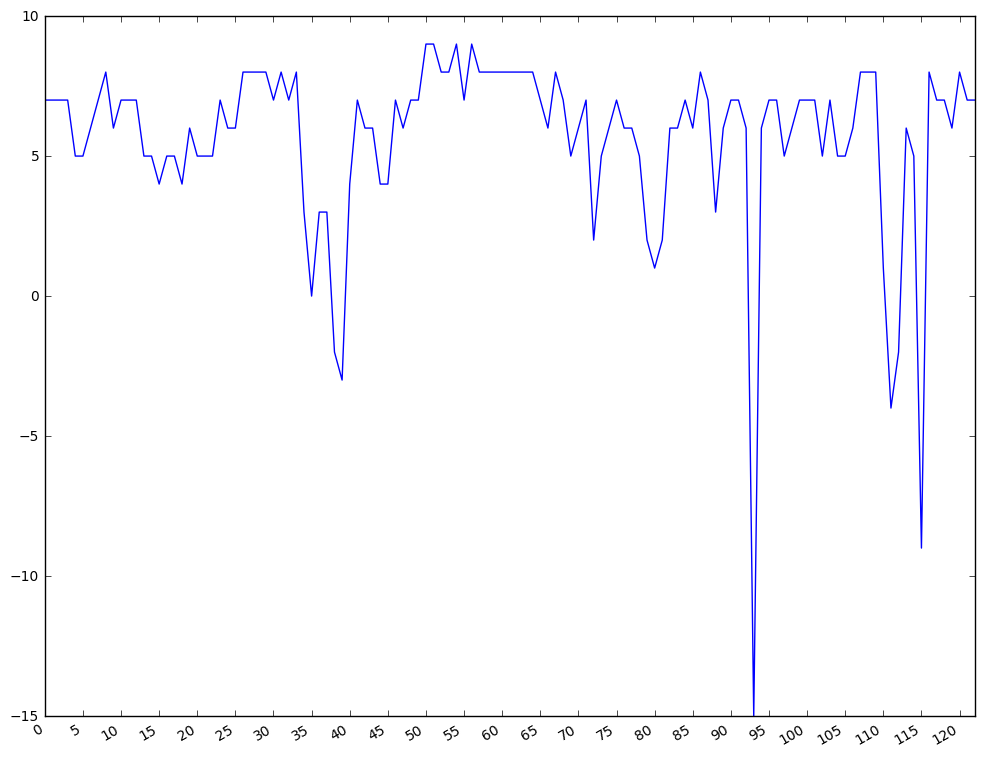

In [96]:
# 信噪比 可视化
subset = result_1['SNR']
subset.plot(subplots=True, figsize = (12,10), grid= False)
ax=plt.gca()
ax.locator_params('x',nbins=40)

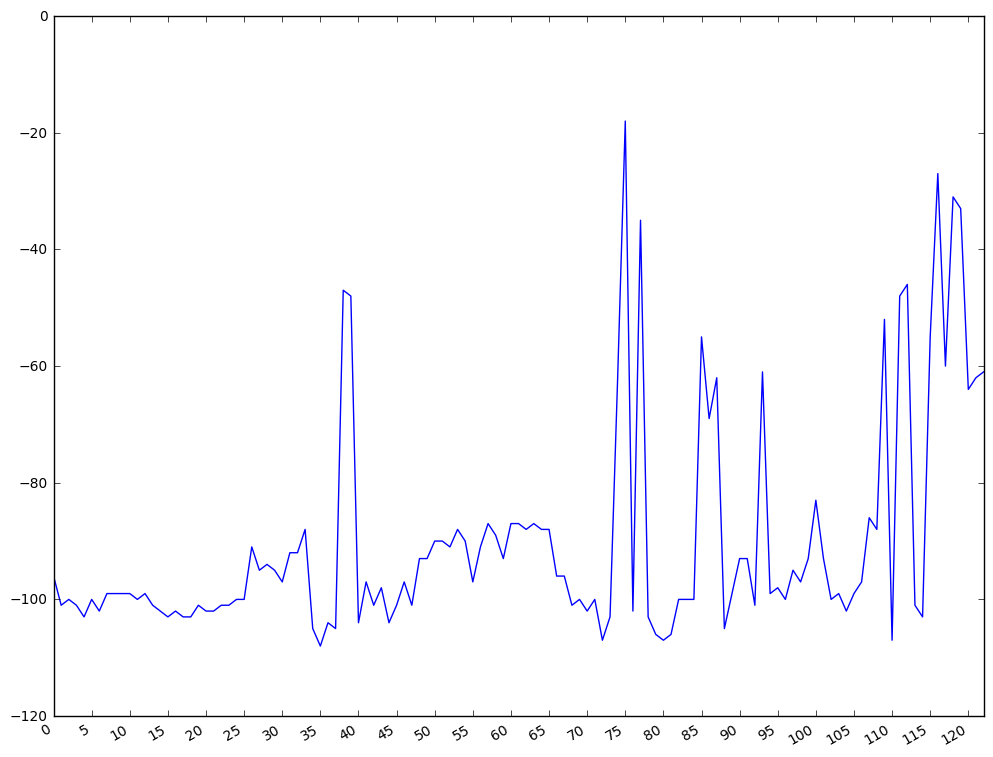

In [97]:
# 接收信号强度 可视化
subset = result_1['RSSIpkt'] 
subset.plot(subplots=True, figsize = (12,10), grid= False)
ax=plt.gca()
ax.locator_params('x',nbins=40)

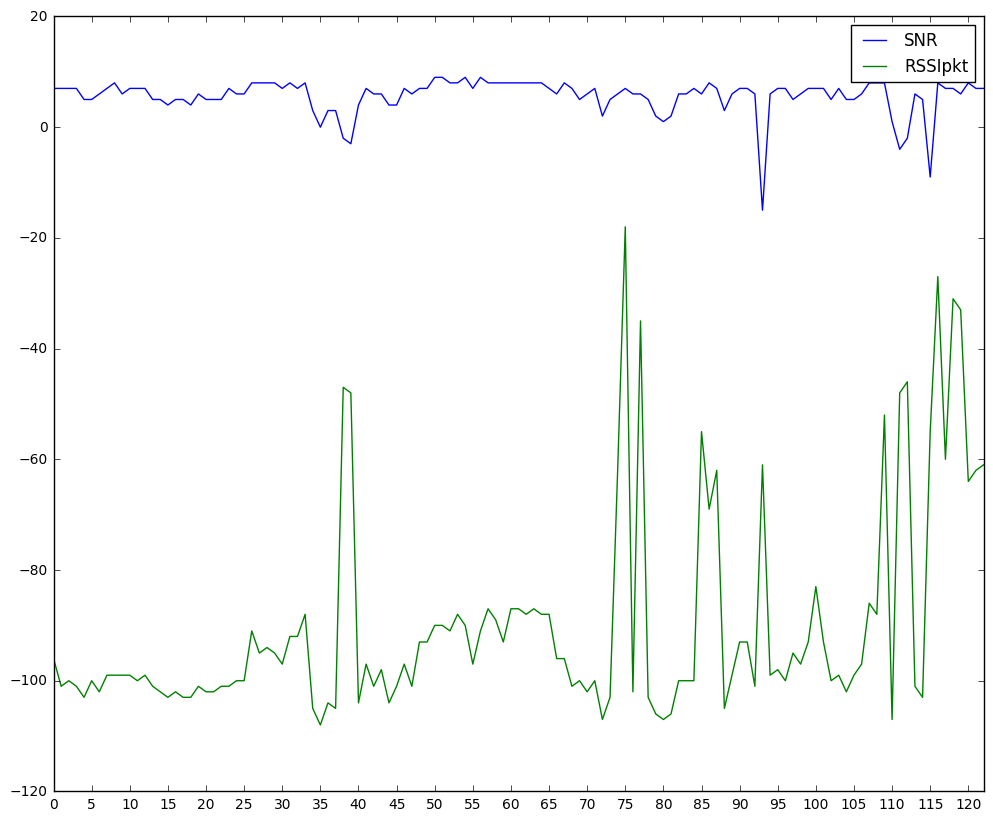

In [17]:
subset = result_1[['SNR', 'RSSIpkt']]
subset.plot(figsize = (12,10))
ax=plt.gca()
ax.locator_params('x',nbins=40)

In [16]:

# subset = result_1[['SNR', 'RSSIpkt']]
# subset.plot.bar(figsize = (12,8), grid= False,color='red')
# ax=plt.gca()
# ax.locator_params('x',nbins=40)

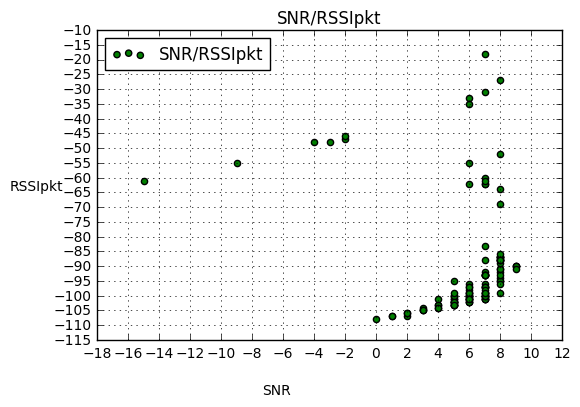

In [21]:
# 信噪比 信号强度 可视化
plt.scatter(result_1['SNR'],result_1['RSSIpkt'],c='g',label='SNR/RSSIpkt')
plt.legend(loc=2)
plt.title('SNR/RSSIpkt')
plt.figtext(0.4,-0.01,'SNR')
plt.figtext(-0.02,0.5,'RSSIpkt')
ax=plt.gca()
plt.grid(True)
ax.locator_params('x',nbins=15)
ax.locator_params('y',nbins=40)